In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Activation, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/aahaber.csv',engine='python',sep = ';',encoding='windows-1254')

sentences_training = data.iloc[:,2]
data_label = data.iloc[:,1]

aahaber=[]
for i in sentences_training:
  aahaber.append(i)
print(aahaber[0])

Using TensorFlow backend.


 piyano sanatçısı yrd  doç  dr  oya ünler bayka   hacettepe senfoni orkestrası eşliğinde konser verdi    


In [4]:
!pip install glove_python
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
words=[]
for i in aahaber:
  words.append(word_tokenize(i))

from glove import Corpus, Glove

corpus=Corpus()
corpus.fit(words,window=10)
glove=Glove(no_components=50, learning_rate=0.2)
glove.fit(corpus.matrix, epochs=50, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')



     |████████████████████████████████| 266kB 4.6MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700260 sha256=75dca4f98b1557fec8d02aeabef6003110ef4674af38362efef087b26a07e73f
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Performing 50 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49


In [5]:
with open("/content/drive/My Drive/Colab Notebooks/glove_deger_aahaber.txt","w") as f:
  for word in glove.dictionary:
    f.write(word)
    f.write(" ")
    for i in range(0,20):
      f.write(str(glove.word_vectors[glove.dictionary[word]][i]))
      f.write(" ")
    f.write("\n")

In [6]:
token = Tokenizer()
token.fit_on_texts(sentences_training)
x = token.texts_to_sequences(sentences_training)
x = pad_sequences(x)

scaler = StandardScaler()
x = scaler.fit_transform(x)

encode = preprocessing.LabelEncoder()
y = encode.fit_transform(data_label)
y = to_categorical(y)
print(y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [7]:
from keras.preprocessing.sequence import pad_sequences
pad_seq=pad_sequences(x)
vocab_size=len(token.word_index)+1

In [8]:
import numpy as np
from numpy import array,asarray,zeros
from tqdm import tqdm
embedding_vector=dict()
f=open('/content/drive/My Drive/Colab Notebooks/glove_deger_aahaber.txt',encoding='utf8')
for line in f:
  value=line.split()
  word=value[0]
  coef=asarray(value[1:],dtype='float32')
  embedding_vector[word]=coef
f.close()

In [9]:
embedding_matrix=np.zeros((vocab_size,20))
for word,i in tqdm(token.word_index.items()):
  embedding_value=embedding_vector.get(word)
  if embedding_value is not None:
    embedding_matrix[i]=embedding_value

100%|██████████| 61200/61200 [00:00<00:00, 504090.41it/s]


In [ ]:
x_train, x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM,Embedding

model=Sequential()
model.add(Embedding(vocab_size,20,weights=[embedding_matrix]))
model.add(LSTM(128))
model.add(Dense(8,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=20,epochs=25,validation_data=(x_test,y_test))
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15999 samples, validate on 4000 samples
Epoch 1/25
15999/15999 [==============================] - 496s 31ms/step - loss: 0.3527 - accuracy: 0.8745 - val_loss: 0.3094 - val_accuracy: 0.8776
Epoch 2/25
15999/15999 [==============================] - 494s 31ms/step - loss: 0.3096 - accuracy: 0.8781 - val_loss: 0.3006 - val_accuracy: 0.8825
Epoch 3/25
15999/15999 [==============================] - 489s 31ms/step - loss: 0.2914 - accuracy: 0.8818 - val_loss: 0.2869 - val_accuracy: 0.8851
Epoch 4/25
15999/15999 [==============================] - 489s 31ms/step - loss: 0.2829 - accuracy: 0.8845 - val_loss: 0.2836 - val_accuracy: 0.8848
Epoch 5/25
15999/15999 [==============================] - 494s 31ms/step - loss: 0.3235 - accuracy: 0.8763 - val_loss: 0.3054 - val_accuracy: 0.8793
Epoch 6/25
15999/15999 [==============================] - 494s 31ms/step - loss: 0.2909 - accuracy: 0.8826 - val_loss: 0.2853 - val_accuracy: 0.8850
Epoch 7/25
15999/15999 [==============================] -

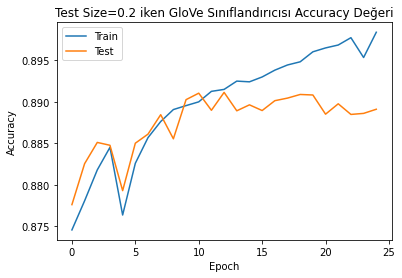

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.2 iken GloVe Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

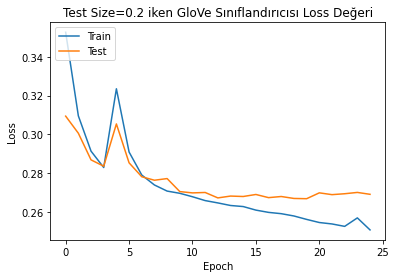

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.2 iken GloVe Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [9]:
x_train, x_test,y_train,y_test=train_test_split(x, y, test_size=0.5, random_state=0)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM,Embedding

model=Sequential()
model.add(Embedding(vocab_size,20,weights=[embedding_matrix]))
model.add(LSTM(128))
model.add(Dense(8,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=20,epochs=25,validation_data=(x_test,y_test))
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9999 samples, validate on 10000 samples
Epoch 1/25
9999/9999 [==============================] - 366s 37ms/step - loss: 0.3687 - accuracy: 0.8743 - val_loss: 0.3367 - val_accuracy: 0.8750
Epoch 2/25
9999/9999 [==============================] - 366s 37ms/step - loss: 0.3194 - accuracy: 0.8777 - val_loss: 0.3219 - val_accuracy: 0.8773
Epoch 3/25
9999/9999 [==============================] - 363s 36ms/step - loss: 0.3014 - accuracy: 0.8794 - val_loss: 0.2924 - val_accuracy: 0.8812
Epoch 4/25
9999/9999 [==============================] - 362s 36ms/step - loss: 0.2911 - accuracy: 0.8822 - val_loss: 0.2871 - val_accuracy: 0.8825
Epoch 5/25
9999/9999 [==============================] - 363s 36ms/step - loss: 0.2852 - accuracy: 0.8838 - val_loss: 0.2853 - val_accuracy: 0.8834
Epoch 6/25
9999/9999 [==============================] - 358s 36ms/step - loss: 0.2790 - accuracy: 0.8866 - val_loss: 0.2809 - val_accuracy: 0.8840
Epoch 7/25
9999/9999 [==============================] - 361s 36ms/ste

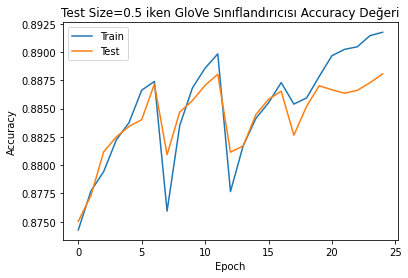

In [11]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.5 iken GloVe Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

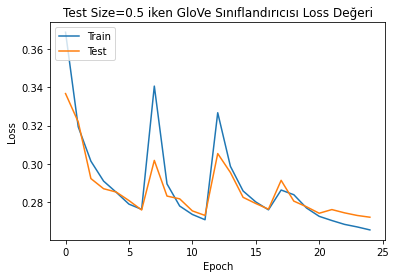

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.5 iken GloVe Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [10]:
x_train, x_test,y_train,y_test=train_test_split(x, y, test_size=0.7, random_state=0)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM,Embedding

model=Sequential()
model.add(Embedding(vocab_size,20,weights=[embedding_matrix]))
model.add(LSTM(128))
model.add(Dense(8,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=20,epochs=25,validation_data=(x_test,y_test))
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5999 samples, validate on 14000 samples
Epoch 1/25
5999/5999 [==============================] - 299s 50ms/step - loss: 0.3803 - accuracy: 0.8742 - val_loss: 0.3402 - val_accuracy: 0.8749
Epoch 2/25
5999/5999 [==============================] - 301s 50ms/step - loss: 0.3300 - accuracy: 0.8763 - val_loss: 0.3153 - val_accuracy: 0.8780
Epoch 3/25
5999/5999 [==============================] - 298s 50ms/step - loss: 0.3065 - accuracy: 0.8788 - val_loss: 0.2980 - val_accuracy: 0.8789
Epoch 4/25
5999/5999 [==============================] - 299s 50ms/step - loss: 0.2995 - accuracy: 0.8796 - val_loss: 0.3089 - val_accuracy: 0.8791
Epoch 5/25
5999/5999 [==============================] - 297s 49ms/step - loss: 0.2937 - accuracy: 0.8812 - val_loss: 0.2875 - val_accuracy: 0.8829
Epoch 6/25
5999/5999 [==============================] - 295s 49ms/step - loss: 0.2873 - accuracy: 0.8828 - val_loss: 0.2890 - val_accuracy: 0.8832
Epoch 7/25
5999/5999 [==============================] - 297s 50ms/ste

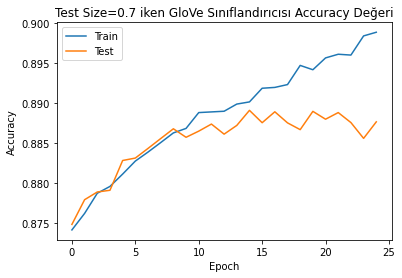

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.7 iken GloVe Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

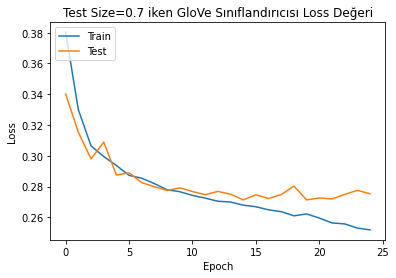

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.7 iken GloVe Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()